In [2]:
!pip install pandas-datareader

     |████████████████████████████████| 112kB 4.6MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 26.7MB/s eta 0:00:01


In [7]:
import pandas as pd
import pandas_datareader as dr
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
from sklearn.svm import SVR

In [58]:
symbol = "MSFT"
start_date = "2007-1-1"
end_date = "2020-07-10"

data = dr.get_data_yahoo(symbol, start_date, end_date)

In [59]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-01-03,30.250000,29.400000,29.910000,29.860001,76935100.0,22.123693
2007-01-04,29.969999,29.440001,29.700001,29.809999,45774500.0,22.086641
2007-01-05,29.750000,29.450001,29.629999,29.639999,44607200.0,21.960684
2007-01-08,30.100000,29.530001,29.650000,29.930000,50220200.0,22.175547
2007-01-09,30.180000,29.730000,30.000000,29.959999,44636600.0,22.197784


In [60]:
scaler = StandardScaler()

In [61]:
close = data[["Adj Close"]]

In [62]:
close.shape

(3404, 1)

In [63]:
scaler.fit(close)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
new_close = scaler.transform(close)

In [65]:
new_close

array([[-0.6680255 ],
       [-0.66891849],
       [-0.67195417],
       ...,
       [ 3.92815072],
       [ 3.96406106],
       [ 3.94839531]])

In [66]:
new_close.shape

(3404, 1)

In [67]:
training_len = int(new_close.shape[0]*0.80)

In [68]:
training_len

2723

In [69]:
train_data = new_close[:training_len]
test_data = new_close[training_len:]

In [70]:
X_train = []
y_train = []

for i in range(60,train_data.shape[0]):
    X_train.append(train_data[i - 60:i,0])
    y_train.append(train_data[i])

In [71]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)

In [72]:
X_train.shape

(2663, 60)

In [73]:
y_train.shape

(2663, 1)

In [74]:
model_1 = LinearRegression()
model_2 = DecisionTreeRegressor()
model_3 = SVR()

In [75]:
X_train.shape

(2663, 60)

In [76]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
X_test = []
y_test = []

for i in range(60,test_data.shape[0]):
    X_test.append(test_data[i - 60:i,0])
    y_test.append(test_data[i])
    
X_test = np.array(X_test)
y_test = np.array(y_test)

In [78]:
X_test.shape

(621, 60)

In [79]:
y_test.shape

(621, 1)

In [80]:
model_1.score(X_test, y_test)

0.9915867705353724

In [81]:
model_2.score(X_test, y_test)

-2.8685414706101153

In [82]:
model_3.score(X_test, y_test)

-5.62262063644856

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
mean_squared_error(y_test, model_1.predict(X_test))

0.004692688191787132

In [85]:
mean_squared_error(y_test, model_2.predict(X_test))

2.1577753174207936

In [86]:
mean_squared_error(y_test, model_3.predict(X_test))

3.693931538419456

In [87]:
y_pred = model_1.predict(X_test)

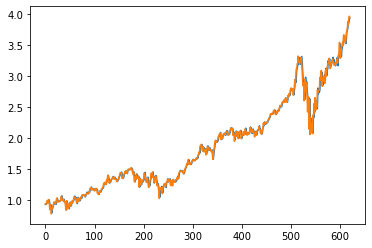

In [88]:
plt.plot(y_pred)
plt.plot(y_test)

In [89]:
latest_60_price = new_close[-60:]

In [90]:
latest_60_input = latest_60_price.reshape((1,60))

In [91]:
tomorrow_pred_price = model_1.predict(latest_60_input)

In [92]:
today_price = latest_60_price[-1]

In [93]:
today_price

array([3.94839531])

In [94]:
if today_price < tomorrow_pred_price:
    print("Purchase this stock..")
else:
    print("Avoid this stock")

Avoid this stock


In [95]:
scaler.inverse_transform(new_close)

array([[ 22.12369347],
       [ 22.08664131],
       [ 21.96068382],
       ...,
       [212.83000183],
       [214.32000732],
       [213.66999817]])